# **Aprendizaje supervisado**
# SL010. Ejercicio SVM

Descargar el dataset ''Adult'' [UCI Machine Learning](https://archive.ics.uci.edu/ml/datasets/Adult). Leer la documentacion del conjunto de datos para definir la tarea a realizar. 

Entrene un modelo de SVM, con 5 fold cross validation y encuentre con GridSearch el conjunto de parametros que maximicen el indice F1. Reporte la matriz de confusion, F1, Recall, Precision y Accuracy.

La tarea consiste en **predecir si los ingresos de una persona exceden los $50K por años basado en los datos del censo**

Los encabezados de las variables son:
- (1) age: continuous.
- (2) workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- (3) fnlwgt: continuous.
- (4) education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- (5) education-num: continuous.
- (6) marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- (7) occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- (8) relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- (9) race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- (10) sex: Female, Male.
- (11) capital-gain: continuous.
- (12) capital-loss: continuous.
- (13) hours-per-week: continuous.
- (14) native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
%matplotlib inline

In [ ]:
data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
data.head(5)
# print(data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
#agregar headers al dataset
heading ={0:'age', 1:'workclass', 2:'fnlwgt', 3:'education', 4:'education-num', 5:'marital-status', 
          6:'occupation', 7:'relationship', 8:'race', 9:'sex', 10:'capital-gain', 11:'capital-loss', 12:'hours-per-week', 
          13:'native-country', 14:'income'}

data.rename(columns = heading, inplace = True)
data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data['workclass'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Name: workclass, Length: 32561, dtype: bool

In [ ]:
null_counts = data.isnull().sum()
null_counts

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

No hay valores nulos dentro del dataset

In [ ]:
print(data.shape)
data.info()

(32561, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Hay varias variables que son categoricas (no numericas) que deben ser pre-procesadas antes de aplicar el categorizador


In [ ]:
#buscar las columnas con variables categoricas
var_no_numericas = data.select_dtypes(include=['object']).columns
var_no_numericas

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

In [ ]:
#estadistica de variable snumericas
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
np.isnan(data['hours-per-week']).sum()

0

In [ ]:
#revisar la proporción de la variable dependiente

data[data.columns[-1]].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [ ]:
for col in var_no_numericas:
  print(data[col].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial

In [ ]:
#datos faltantes esta con un "?", eliminar dichas entradas del dataset.

# mask = data['workclass'] == ' ?'
# mask.sum()
data.isin([' ?']).sum()

# data['workclass'].unique()

data['workclass'] = data['workclass'].replace(' ?', np.nan)
data['occupation'] = data['occupation'].replace(' ?', np.nan)
data['native-country'] = data['native-country'].replace(' ?', np.nan)

print(data.isnull().sum())


age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


In [ ]:
# calcular cuanto % del dataset no tiene datos
entradas_sin_datos = data.isnull().sum() * 100 / len(data)
print(entradas_sin_datos)

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.790486
income            0.000000
dtype: float64


Conclusión: Es cercano a un 5% del dataset, por lo que se van a eliminar esas entradas

In [ ]:
data.dropna(how='any', inplace=True)
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

eliminar ahora las entradas duplicadas

In [ ]:
print(f"Hay {data.duplicated().sum()} valores dupliados")

data.drop_duplicates(inplace=True)

print(f"Ahora hay {data.duplicated().sum()} valores duplicados")

Hay 23 valores dupliados
Ahora hay 0 valores duplicados


Eliminar variables que no aportan a la explicación del "income" o que explican lo mismo:

- "education" y "education-num" son lo mismo, pero uno es númerico y el otro string.
- "capital-gain" y "capital-loss" son en gran mayoria ceros.

En conclusión, se eliminan esas variables.



In [ ]:
data.drop(['capital-gain', 'capital-loss', 'education'], axis=1, inplace=True)
data

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32557,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32558,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32559,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


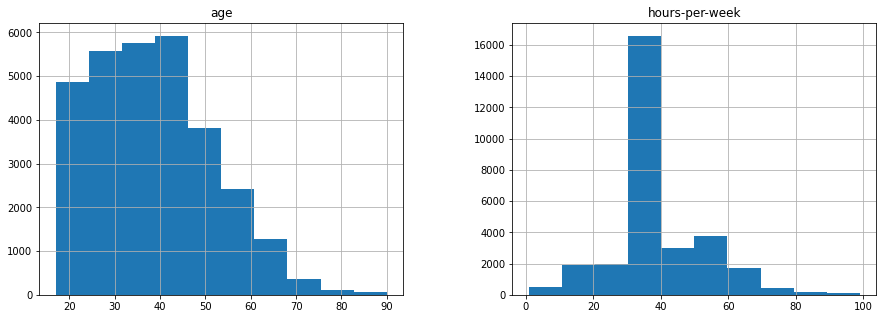

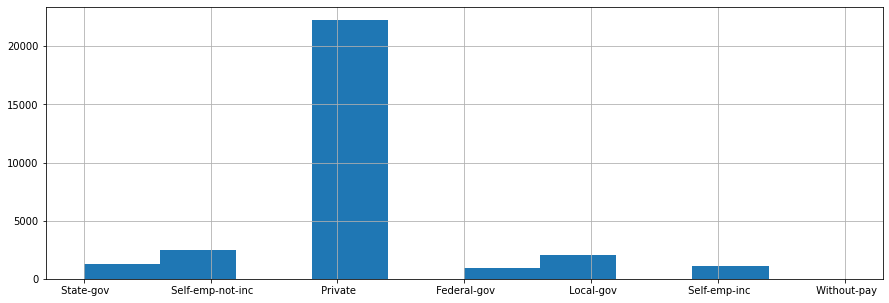

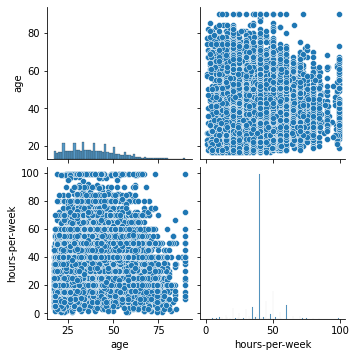

In [ ]:
#plot histograms 

data[['age', 'hours-per-week']].hist(figsize=(15,5))
plt.show()

data['workclass'].hist(figsize=(15,5))
plt.show()

sns.pairplot(data[['age', 'hours-per-week']])


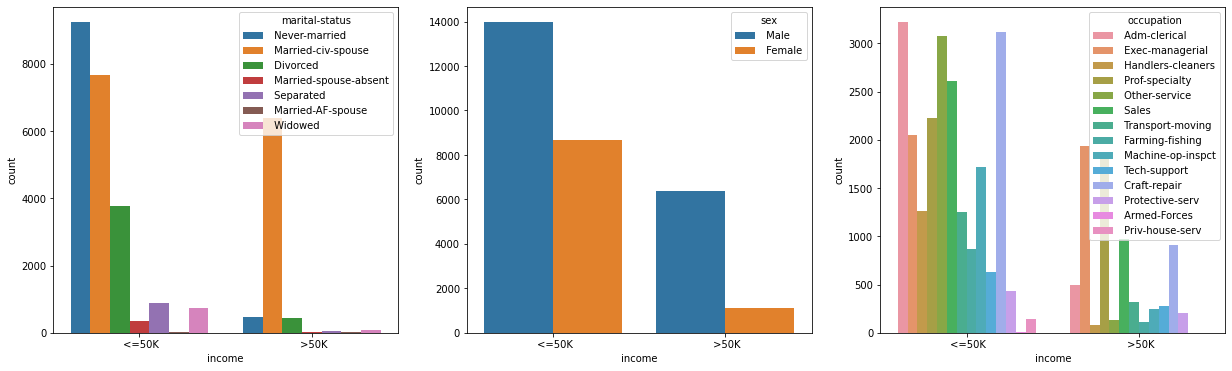

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(21,6))

sns.countplot(x='income', hue='marital-status', data=data, ax = ax[0])
sns.countplot(x='income', hue='sex', data=data, ax = ax[1])
sns.countplot(x='income', hue='occupation', data=data, ax = ax[2])

In [ ]:
#son variables nominales, por lo que se utilizará get_dummies para pasar de string a variables numericas

var_cat_nominales = [ 'workclass', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country']

data_nom = pd.get_dummies(data[var_cat_nominales])
data_nom.head(5)


,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# La variable income es ordinal, por lo que se normalizará con 0 y 1 para la categorización

from sklearn import preprocessing

le   = preprocessing.LabelEncoder()

data['income2'] = le.fit_transform(data['income'])
data


,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,income2
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,0
32557,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,1
32558,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,0
32559,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K,0


In [ ]:
# create final dataset

filtered_data = pd.concat([data, data_nom], axis=1)
filtered_data = filtered_data.drop(var_cat_nominales, axis=1)
filtered_data.drop('income', axis=1, inplace=True)
filtered_data.head()

,age,fnlwgt,education-num,hours-per-week,income2,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,13,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#Machine learning - SVM

In [ ]:
X = filtered_data.drop('income2', axis = 1)
y = filtered_data['income2']

In [ ]:
y[0:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    1
Name: income2, dtype: int64

In [ ]:
X[0:10]

,age,fnlwgt,education-num,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,40,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,13,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,37,284582,14,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,49,160187,5,16,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,52,209642,9,45,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
8,31,45781,14,50,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,42,159449,13,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score, accuracy_score, accuracy_score, auc, roc_curve, make_scorer

sc = StandardScaler()
X = sc.fit_transform(X)
# X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)

# , stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [ ]:
modelSVC = SVC(kernel='rbf', C=1E0) #kernel='rbf'
# SVC(gamma='scale'))
modelSVC.fit(X_train, y_train)

y_pred = modelSVC.predict(X_test)

report_SVC = classification_report(y_test, y_pred, target_names= ['<=50K', '>50K'])
print(report_SVC)
mat_SVC = confusion_matrix(y_test, y_pred)
print(mat_SVC)

              precision    recall  f1-score   support

       <=50K       0.86      0.93      0.89      4510
        >50K       0.72      0.54      0.61      1518

    accuracy                           0.83      6028
   macro avg       0.79      0.73      0.75      6028
weighted avg       0.82      0.83      0.82      6028

[[4186  324]
 [ 704  814]]


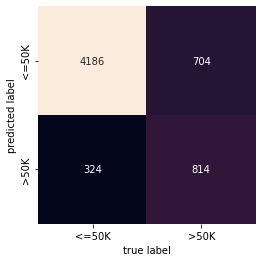

In [ ]:
sns.heatmap(mat_SVC.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
#optimizar los estimadores para el ajuste de la SVM

# definir parametros de los estimadores
# 0.1, 1, 10, 100, 1000]
# 1, 0.1, 0.01, 0.001, 0.0001, 1E-5
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1E-5],
              'kernel': ['rbf']}
f1 = make_scorer(f1_score , average='macro')

gridSVC = GridSearchCV(modelSVC, param_grid, scoring=f1)

gridSVC.fit(X_train, y_train)
print(gridSVC.best_params_)

modelSVC_best = gridSVC.best_estimator_
y_pred = modelSVC_best.predict(X_test)

#indices de el mejor ajuste
print(10*'---')
print('Metricas de ajuste para los mejores estimadores')
print(f'Accuracy = {accuracy_score(y_test, y_pred)}')
print(f'Precision Score = {precision_score(y_test, y_pred)}')
print(f'Recall Score = {recall_score(y_test, y_pred)}')
print(f'F1 Score = {f1_score(y_test, y_pred)}')
print(10*'---')


{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
------------------------------
Metricas de ajuste para los mejores estimadores
Accuracy = 0.8287989382879893
Precision Score = 0.6931637519872814
Recall Score = 0.5744400527009222
F1 Score = 0.6282420749279539
------------------------------


In [ ]:
# https://www.kaggle.com/code/sanjay7013/adult-census-income

In [ ]:
# https://colab.research.google.com/github/JL1829/turbo-funicular/blob/master/_notebooks/2020-03-24-End-to-End%20Data%20Science%20Project%20with%20Adult%20Income%20Dataset.ipynb#scrollTo=pcah9aKqGWFo

In [ ]:
X

array([[ 0.04251551, -1.06267604,  1.12899598, ...,  0.31061547,
        -0.04613039, -0.02304681],
       [ 0.88021451, -1.00782869,  1.12899598, ...,  0.31061547,
        -0.04613039, -0.02304681],
       [-0.03363895,  0.24466912, -0.44043393, ...,  0.31061547,
        -0.04613039, -0.02304681],
       ...,
       [ 1.48945015, -0.35856661, -0.44043393, ...,  0.31061547,
        -0.04613039, -0.02304681],
       [-1.25211023,  0.11068825, -0.44043393, ...,  0.31061547,
        -0.04613039, -0.02304681],
       [ 1.03252342,  0.92877986, -0.44043393, ...,  0.31061547,
        -0.04613039, -0.02304681]])

In [ ]:
# 5 fold cross validation 
# Reporte la matriz de confusion, F1, Recall, Precision y Accuracy.

from sklearn.model_selection import KFold

accuracy_values = []
precision_values= []
recall_values   = []
f1_values       = []
mtx_conf_values = []


kf = KFold(n_splits=5,shuffle=True)
for k, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    modelSVC = SVC(kernel='rbf', C=100, gamma=0.0001) #kernel='rbf'
    modelSVC.fit(X_train, y_train)

    y_pred = modelSVC.predict(X_test)

    accuracy_values.append(accuracy_score(y_test, y_pred))
    precision_values.append(precision_score(y_test, y_pred))
    recall_values.append(recall_score(y_test, y_pred))
    f1_values.append(f1_score(y_test, y_pred))
    mtx_conf_values.append(confusion_matrix(y_test, y_pred))

    # print(f'Accuracy = {accuracy_score(y_test, y_pred)}')
    # print(f'Precision Score = {precision_score(y_test, y_pred)}')
    # print(f'Recall Score = {recall_score(y_test, y_pred)}')
    # print(f'F1 Score = {f1_score(y_test, y_pred)}')



In [ ]:
accuracy_values

[0.8301260783012607,
 0.8241539482415395,
 0.8307896483078965,
 0.8190112806901128,
 0.8276090924174548]

In [ ]:
# plotear valores medios y desviación estandar

print(f'El valor promedio para Accuracy es {np.mean(accuracy_values):.2f} y una desviación estandar de {np.std(accuracy_values):.4f}')
print(f'El valor promedio para Precision es {np.mean(precision_values):.2f} y una desviación estandar de {np.std(precision_values):.4f}')
print(f'El valor promedio para Recall es {np.mean(recall_values):.2f} y una desviación estandar de {np.std(recall_values):.4f}')
print(f'El valor promedio para f1-score es {np.mean(f1_values):.2f} y una desviación estandar de {np.std(f1_values):.4f}')


El valor promedio para Accuracy es 0.83 y una desviación estandar de 0.0043
El valor promedio para Precision es 0.68 y una desviación estandar de 0.0194
El valor promedio para Recall es 0.57 y una desviación estandar de 0.0104
El valor promedio para f1-score es 0.57 y una desviación estandar de 0.0104


(array([1., 0., 0., 0., 1., 0., 0., 1., 0., 2.]),
 array([0.81901128, 0.82018912, 0.82136695, 0.82254479, 0.82372263,
        0.82490046, 0.8260783 , 0.82725614, 0.82843397, 0.82961181,
        0.83078965]),
 <a list of 10 Patch objects>)

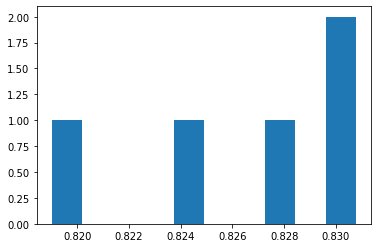

In [ ]:
plt.hist(accuracy_values)

In [ ]:
#presentar la matrix de confusión promedio
print(mtx_conf_values)
print(np.mean(mtx_conf_values, axis=0))
print(np.std(mtx_conf_values, axis=0))

[array([[4103,  388],
       [ 636,  901]]), array([[4108,  374],
       [ 686,  860]]), array([[4186,  412],
       [ 608,  822]]), array([[4100,  454],
       [ 637,  837]]), array([[4106,  402],
       [ 637,  882]])]
[[4120.6  406. ]
 [ 640.8  860.4]]
[[32.81219286 27.21764134]
 [25.18253363 28.76525682]]
